In [1]:
import numpy as np
import torch
import os
import matplotlib.pyplot as plt
import pandas as pd

import opnet
from simple_inversion_data import generate_data, save_data, load_data

path = '../saved_models.simple_inversion_net.pth'

In [2]:
dim = 2 # use 2 x 2 matrices
num_layers = 10
model = opnet.OperatorNet(dim, num_layers, useReLU=False)
loss_f = torch.nn.MSELoss()
table1 = pd.DataFrame()

In [3]:
import train_test
import os.path
from importlib import reload

reload(train_test)
reload(opnet)

<module 'opnet' from '/home/liiva/studijas/oprecnn/opnet.py'>

In [4]:
lr_list = [1e-5, 1e-3, 1e-2, 1e-1, 2e-1, 3e-1]
losses_list=[]

In [5]:
if os.path.exists(path):
    model.load_state_dict(torch.load(path))
else:
    print("No old path, creating new one")
    torch.save(model.state_dict(), path)
    model.load_state_dict(torch.load(path))

for lr in lr_list:
    losses_list.append(train_test.train_test(model=model, loss_f=loss_f,lr=lr, name="test",epochs=100))

In [6]:
epo = np.arange(0,100,10)+10
#print(epo)

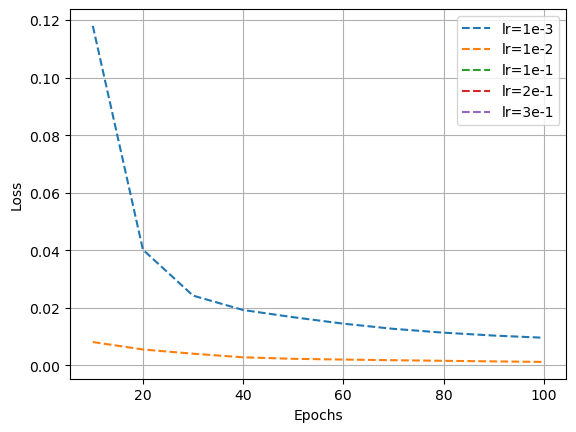

In [7]:
#plt.plot(epo, losses_list[0])
from matplotlib.lines import lineStyles


plt.plot(epo, losses_list[1], label = 'lr=1e-3', linestyle='--')
plt.plot(epo, losses_list[2], label = 'lr=1e-2', linestyle='--')
plt.plot(epo, losses_list[3], label = 'lr=1e-1', linestyle='--')
plt.plot(epo, losses_list[4], label = 'lr=2e-1', linestyle='--')
plt.plot(epo, losses_list[5], label = 'lr=3e-1', linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.legend()

In [8]:
indicies = np.arange(0, 100,step = 10)

In [9]:
index_x = ["2","4","6","8", "10"]
index_x = ["10", "20", "30", "40", "50", "60", "70", "80", "90", "100"]
index_y = [1e-5, 1e-3, 1e-2, 1e-1, 2e-1, 3e-1]
table1 = pd.DataFrame(losses_list, columns=index_x, index = index_y)
table1.index.name = "lr"
table1.to_csv("./results/Table1_100.csv", index=True)
table1

,10,20,30,40,50,60,70,80,90,100
lr,,,,,,,,,,
0.00001,0.777488,0.562439,0.450141,0.385292,0.344800,0.317269,0.296871,0.280601,0.266887,0.254889
0.00100,0.117943,0.040214,0.024270,0.019271,0.016768,0.014528,0.012732,0.011399,0.010400,0.009631
0.01000,0.008143,0.005559,0.004093,0.002850,0.002321,0.002059,0.001833,0.001625,0.001424,0.001238
0.10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.20000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.30000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
from operator import index

In [11]:
path = './test_relu.pth'
dim = 2 # use 2 x 2 matrices
num_layers = 5
model = opnet.OperatorNet(dim, num_layers, useReLU=True)
loss_f = torch.nn.MSELoss()
df1 = pd.DataFrame()
losses_list1=[]

In [12]:
if os.path.exists(path):
    model.load_state_dict(torch.load(path))
else:
    print("No old path, creating new one")
    torch.save(model.state_dict(), path)
    model.load_state_dict(torch.load(path))

for lr in lr_list:
    losses_list1.append(train_test.train_test(model=model, loss_f=loss_f,lr=lr, name="test_relu",epochs=100))

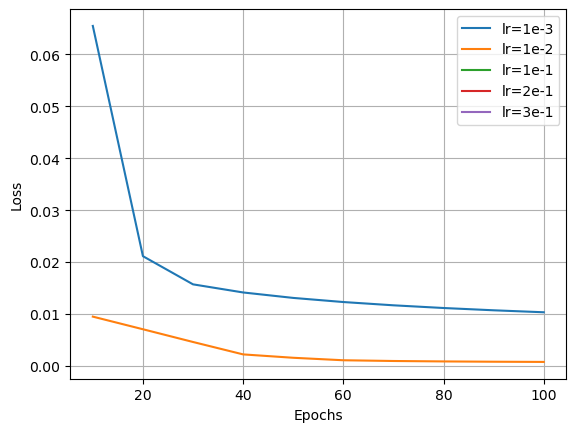

In [13]:
plt.plot(epo, losses_list1[1], label = 'lr=1e-3', linestyle='-')
plt.plot(epo, losses_list1[2], label = 'lr=1e-2', linestyle='-')
plt.plot(epo, losses_list1[3], label = 'lr=1e-1', linestyle='-')
plt.plot(epo, losses_list1[4], label = 'lr=2e-1', linestyle='-')
plt.plot(epo, losses_list1[5], label = 'lr=3e-1', linestyle='-')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.legend()

In [14]:
index_x = ["2","4","6","8", "10"]
index_x = ["10", "20", "30", "40", "50", "60", "70", "80", "90", "100"]
index_y = [1e-5, 1e-3, 1e-2, 1e-1, 2e-1, 3e-1]
df1 = pd.DataFrame(losses_list1, columns=index_x, index = index_y)
df1.index.name = "lr"
df1.to_csv("./results/Table1_relu_100.csv", index=True)
df1

,10,20,30,40,50,60,70,80,90,100
lr,,,,,,,,,,
0.00001,0.811008,0.284013,0.208057,0.177318,0.157161,0.142825,0.132158,0.123862,0.117141,0.111505
0.00100,0.065504,0.021131,0.015703,0.014139,0.013089,0.012295,0.011664,0.011144,0.010704,0.010323
0.01000,0.009483,0.007050,0.004596,0.002204,0.001553,0.001075,0.000933,0.000849,0.000793,0.000754
0.10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.20000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.30000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Loss')

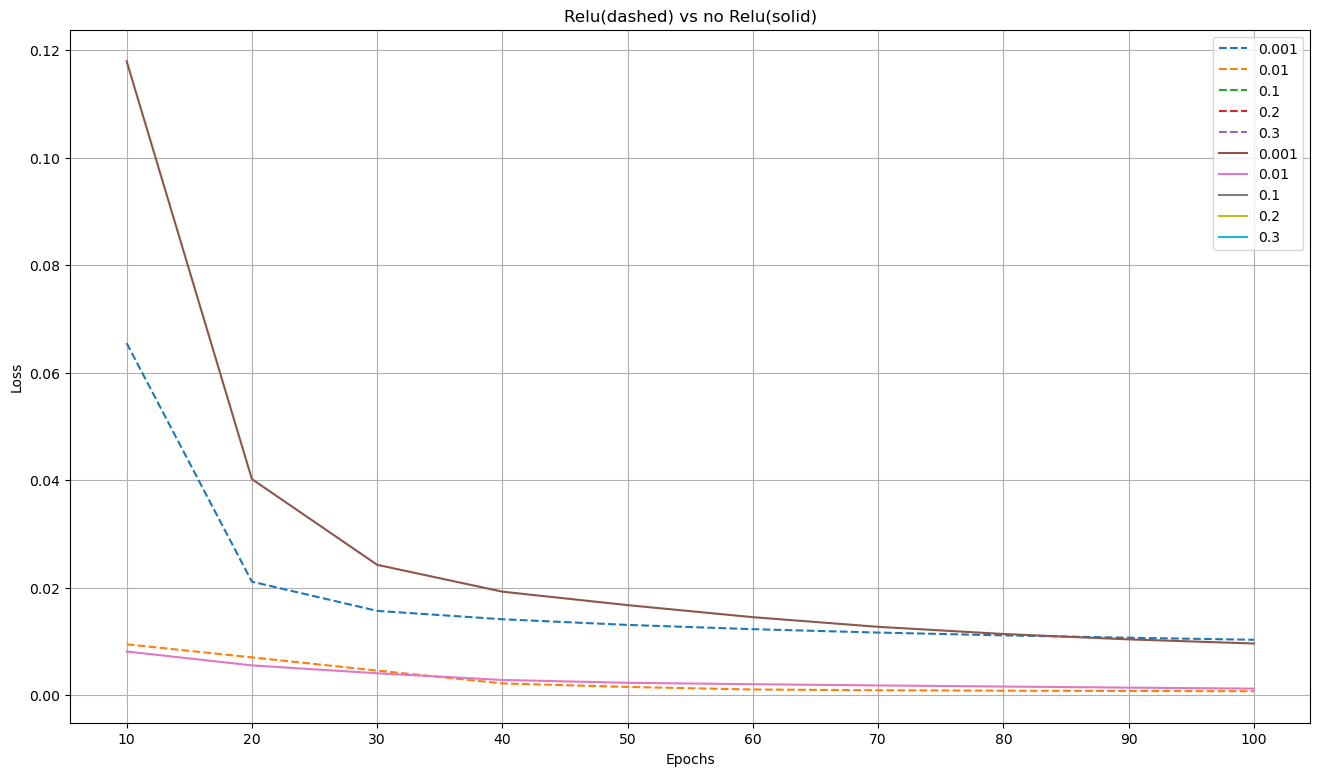

In [15]:
fig, ax = plt.subplots(1,1, figsize = (16,9))
for index, row in df1.iloc[1:,:].iterrows():
    ax.plot(df1.columns, row, label=index, linestyle='--')

for index, row in table1.iloc[1:,:].iterrows():
    ax.plot(table1.columns, row, label = index, linestyle='-')
plt.title("Relu(dashed) vs no Relu(solid)")
plt.grid()
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [16]:
df2 = pd.read_csv("./old/results/Table1.csv", index_col="lr")
df3 = pd.read_csv("./old/results/Table1_negative.csv", index_col="lr")
df4 = pd.read_csv("./old/results/Table1_posneg.csv", index_col="lr")

Text(0, 0.5, 'Loss')

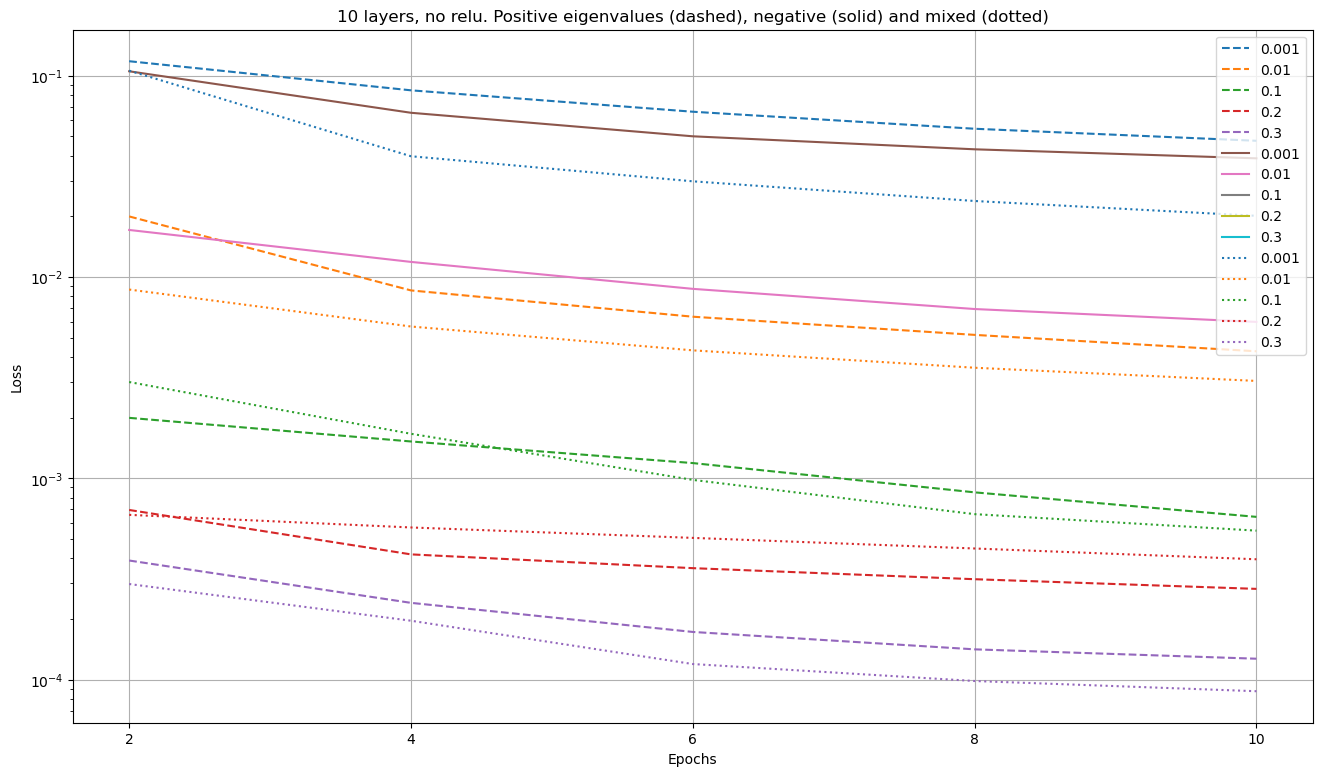

In [17]:
fig, ax = plt.subplots(1,1, figsize = (16,9))
for index, row in df2.iloc[1:,:].iterrows():
    ax.plot(df2.columns, row, label=index, linestyle='--')

for index, row in df3.iloc[1:,:].iterrows():
    ax.plot(df3.columns, row, label = index, linestyle='-')

for index, row in df4.iloc[1:,:].iterrows():
    ax.plot(df4.columns, row, label = index, linestyle=':')
plt.title("10 layers, no relu. Positive eigenvalues (dashed), negative (solid) and mixed (dotted)")
plt.grid()
plt.legend()
ax.set_yscale('log')
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [19]:
df5 = pd.read_csv("./old/results/Table1_relu.csv", index_col="lr")
df6 = pd.read_csv("./old/results/Table1_relu_negative.csv", index_col="lr")
df7 = pd.read_csv("./old/results/Table1_relu_posneg.csv", index_col="lr")

Text(0, 0.5, 'Loss')

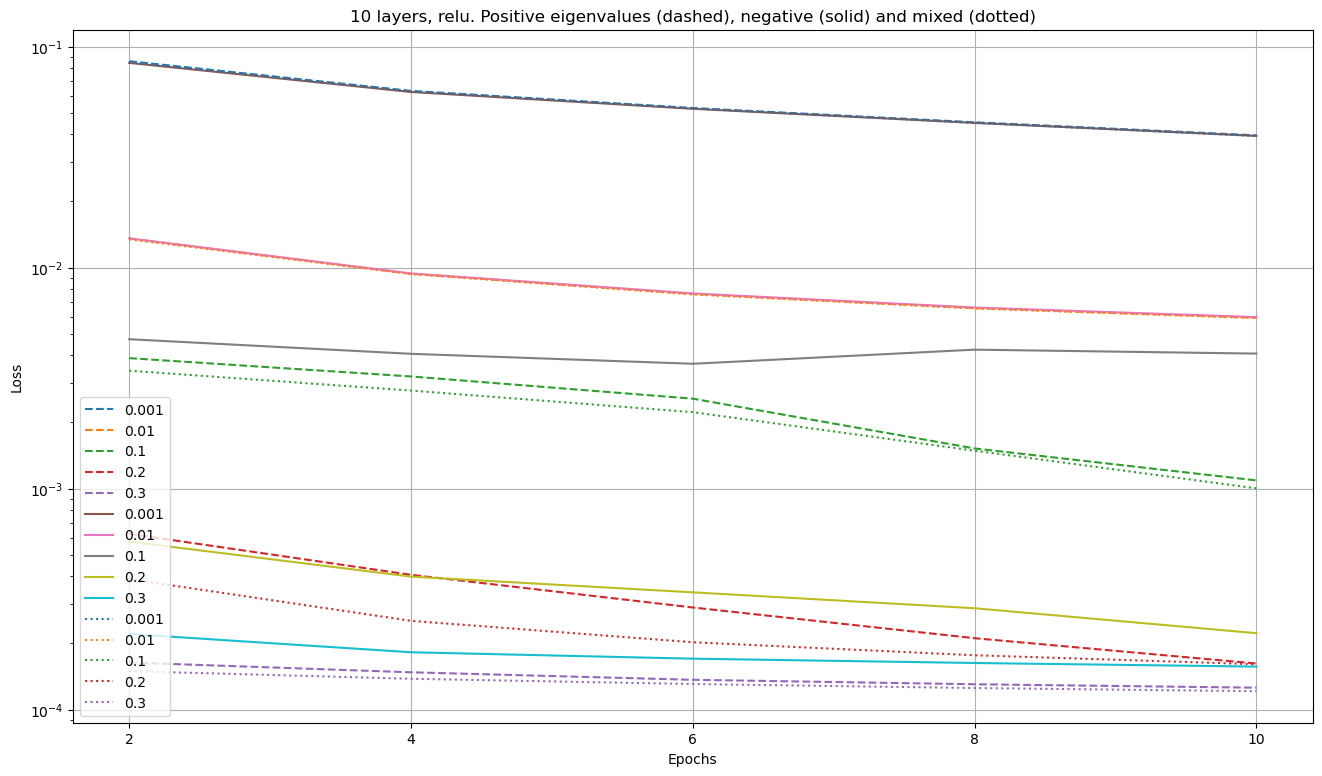

In [20]:
fig, ax = plt.subplots(1,1, figsize = (16,9))
for index, row in df5.iloc[1:,:].iterrows():
    ax.plot(df5.columns, row, label=index, linestyle='--')

for index, row in df6.iloc[1:,:].iterrows():
    ax.plot(df6.columns, row, label = index, linestyle='-')

for index, row in df7.iloc[1:,:].iterrows():
    ax.plot(df7.columns, row, label = index, linestyle=':')
plt.title("10 layers, relu. Positive eigenvalues (dashed), negative (solid) and mixed (dotted)")
plt.grid()
plt.legend()
ax.set_yscale('log')
plt.xlabel("Epochs")
plt.ylabel("Loss")